<a href="https://colab.research.google.com/github/a-dhingra/JupyterNotebooks/blob/master/Seaborn_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**STARTING WITH HEATMAP**

In [3]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


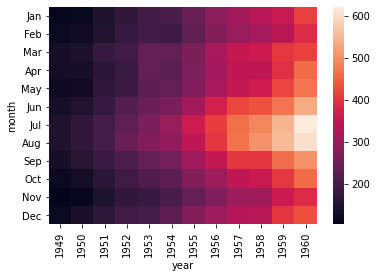

In [7]:
ax = sns.heatmap(flights)

In [4]:
flights.shape

(144, 3)

In [5]:
flights = flights.pivot(index='month',columns='year', values='passengers')
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [6]:
flights.shape

(12, 12)

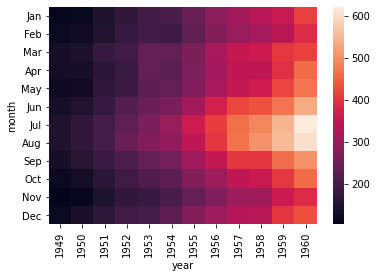

In [9]:
pivoted_ax = sns.heatmap(flights)
## Lesson - Heatmap function reads the data well, even without pivotting. Pivotting helps to read the table better, though.

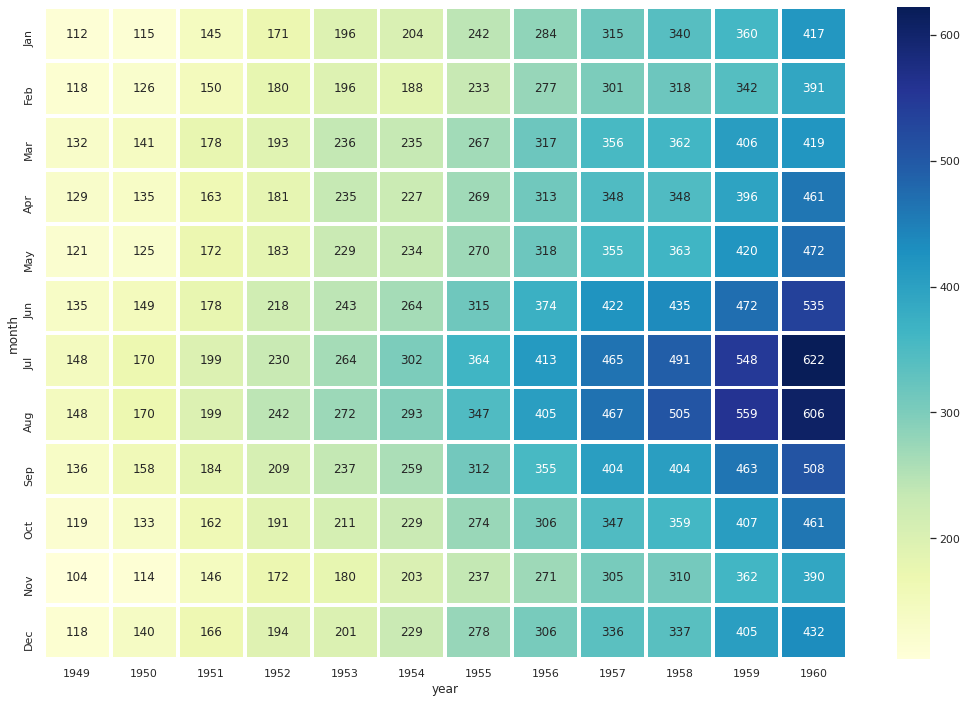

In [33]:
sns.set_theme(style="white")
plt.figure(figsize=(18,12))
pivoted_ax = sns.heatmap(flights, cmap='YlGnBu', linewidths=3, annot=True, fmt='d',linecolor='white')


**CORRELATION**

In [20]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
tips_corr = tips.corr()
tips_corr.head()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000




*   Need to give numberic value to sex, time, day
*   Add them as new columns in dataframe



In [34]:
from sklearn.preprocessing import LabelEncoder

In [36]:
labelencoder = LabelEncoder()
for column in tips.columns:
  tips[column] = labelencoder.fit_transform(tips[column])
  
tips.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,111.553279,57.602459,0.643443,0.381148,1.741803,0.278689,1.569672
std,65.946677,33.185626,0.479967,0.486667,0.926815,0.449276,0.951100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.750000,31.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,111.500000,59.500000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,167.250000,85.250000,1.000000,1.000000,3.000000,1.000000,2.000000
max,228.000000,122.000000,1.000000,1.000000,3.000000,1.000000,5.000000


In [37]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,102,1,0,0,2,0,1
1,21,18,1,0,2,0,2
2,147,83,1,0,2,0,2
3,163,77,1,0,2,0,1
4,171,87,0,0,2,0,3
5,176,103,1,0,2,0,3
6,10,31,1,0,2,0,1
7,183,68,1,0,2,0,3
8,73,28,1,0,2,0,1
9,70,74,1,0,2,0,1


In [38]:
tips.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.674203,0.147323,0.062771,-0.038994,-0.207596,0.591946
tip,0.674203,1.000000,0.062631,0.013497,0.001867,-0.133306,0.472668
sex,0.147323,0.062631,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.062771,0.013497,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.038994,0.001867,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.207596,-0.133306,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.591946,0.472668,0.086195,-0.133178,0.069510,-0.103411,1.000000


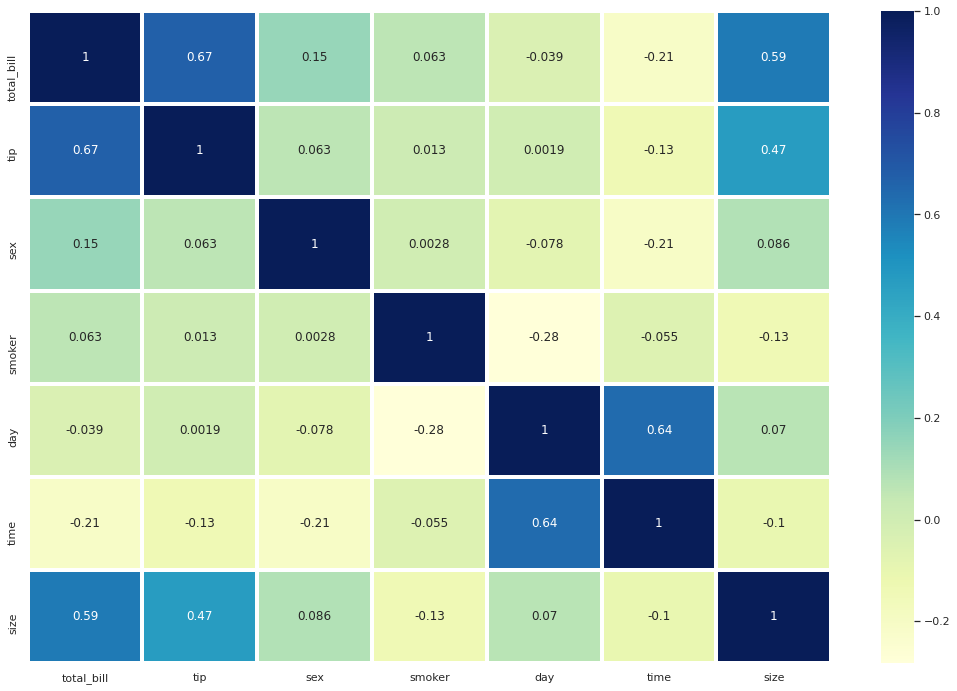

In [41]:
sns.set_theme(style="white")
plt.figure(figsize=(18,12))
tips_corr_ax = sns.heatmap(tips.corr(), cmap='YlGnBu', linewidths=3, linecolor='white', annot=True, fmt='0.2g')